Kaggle Titanic Problem

Link For The Problem
https://www.kaggle.com/c/titanic-gettingStarted


In [57]:
#importing all the import packages
import pandas as pd
from pandas import Series,DataFrame

#Titanic csv file as a DataFrame
titanic_df = pd.read_csv('C:\\Users\\jatin\\Desktop\\Git Projects\\Data set\\train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Finding out all the information present in the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Purpose: Look for the factors that contributed towards people survival

Basic Analysis Questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Factors Helped People Survive:

    5.) What factors helped someone survive the sinking?

Question 1) Who were the passengers on the titanic?

In [6]:
#visualizing the data 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

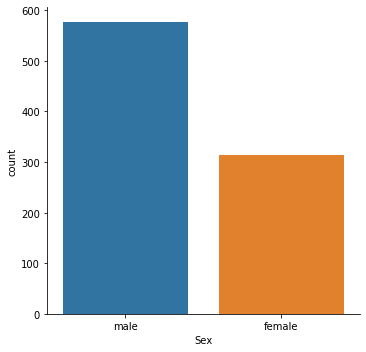

In [11]:
# Ratio between male and female on the ship
sns.factorplot('Sex',data=titanic_df, kind= "count")

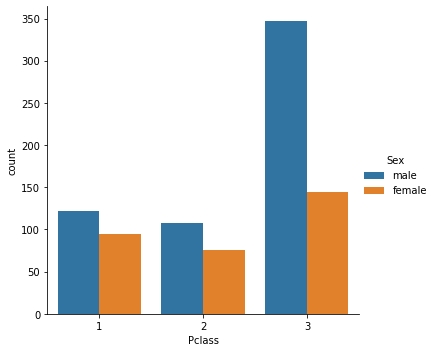

In [13]:
#Gender seperated by class
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind = "count")

Looking at the data visualization above, It is very clear that there are many more males in 3rd class as compared to females which is pretty interesting. However,it would be very useful to know the split between males,females,and children.

In [15]:
# Considering everyone under the age of 18 as a child, and then create a new column

# function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 18:
        return 'child'
    else:
        return sex
    

# new column as people
titanic_df['people'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,people
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


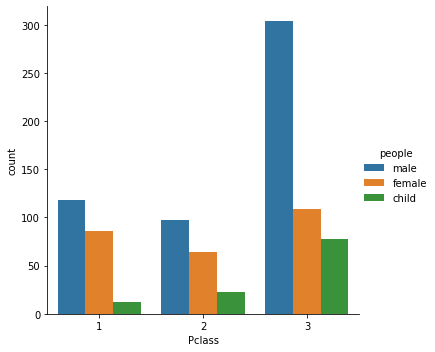

In [17]:
sns.factorplot('Pclass',data=titanic_df,hue='people', kind = "count")

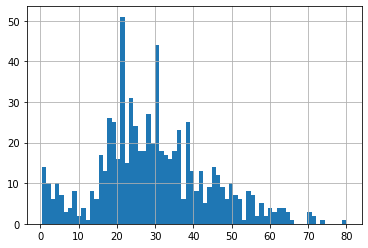

In [18]:
titanic_df['Age'].hist(bins=70)

In [19]:
#comparing number of male,female,child
titanic_df['people'].value_counts()

male      519
female    259
child     113
Name: people, dtype: int64

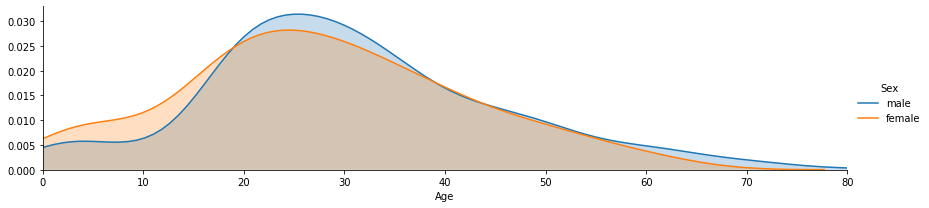

In [20]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since no one can be negative years old ,setting the x lower limit at 0
fig.set(xlim=(0,oldest))

fig.add_legend()

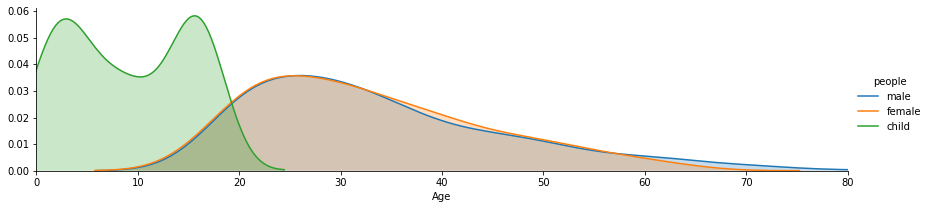

In [21]:
#including the 'people' column to include children:

fig = sns.FacetGrid(titanic_df, hue="people",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

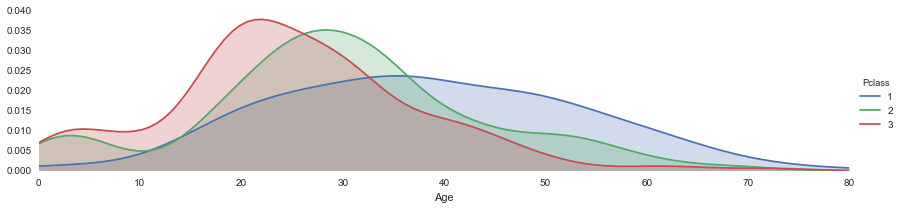

In [131]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


It gives a pretty good picture of who the passengers were based on Sex, Age, and Class.
We can say that the First class has a normal distribution of age but the second and the third class are more near 20's and 30's



Question 2): What deck were the passengers on and how does that relate to their class?

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,people
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [24]:
#drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [25]:
# deck preview
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

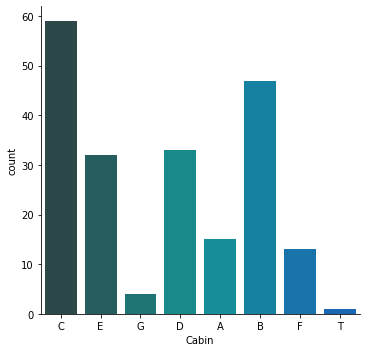

In [27]:
#empty list to store level
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind="count")

Interesting to note we have a 'T' deck value there which doesn't make sense, we  can drop it out with the following code:

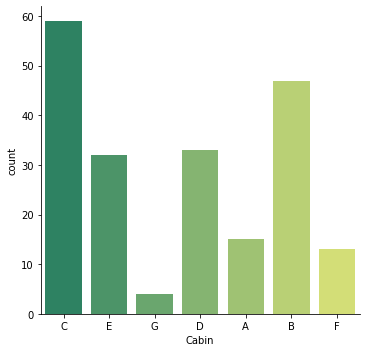

In [28]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='summer', kind="count")

Question 3) Where did the passengers come from?

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,people
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Embarked column has C,Q,and S values which stands for Cherbourg, Queenstown, Southhampton.

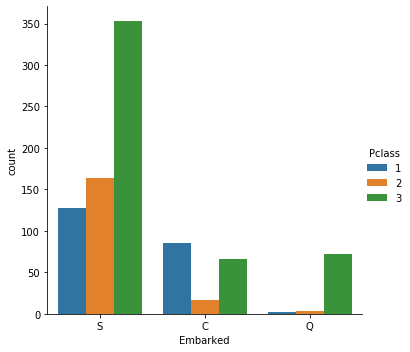

In [34]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind = "count")

In Southhampton, almost all the passengers that boarded there were 3rd class. It gives us the the idea about the economic condtion of Southhampton at that time.

Question 4) Who was alone and who was with family?

In [35]:
# adding a new column as alone, to find out who were alone on the ship.

titanic_df['Family'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

Now we know that if the Alone column is anything apart from 0, then the passenger had family aboard and wasn't alone.


In [36]:
# Look for >0 or ==0 to set alone status
titanic_df['Family'].loc[titanic_df['Family'] >0] = 'With Family'
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 'Alone'

C:\Users\jatin\Anaconda3\envs\pytorch_env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
# data with the new column
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,people,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


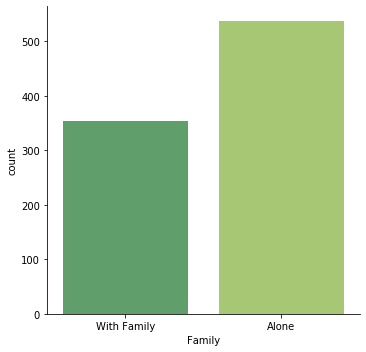

In [42]:
sns.factorplot('Family',data=titanic_df,palette='summer', kind = "count")

 Question 5): What factors helped people survive the sinking?

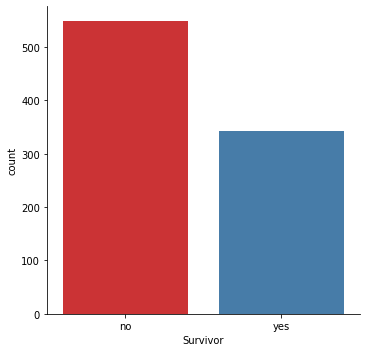

In [44]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1', kind = "count")

So quite a few more people died than those who survived.

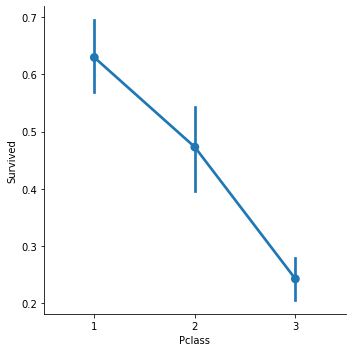

In [45]:
# Let's use a factor plot again, but now considering class against the people who surived
sns.factorplot('Pclass','Survived',data=titanic_df)

Looks like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

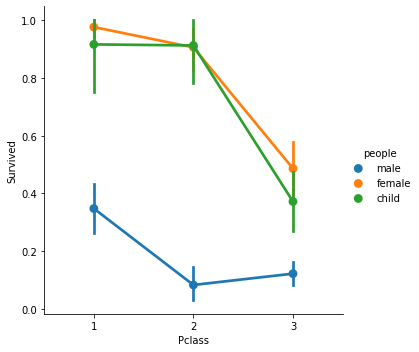

In [46]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='people',data=titanic_df)

From this result it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of male in any class dramatically decreased the chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

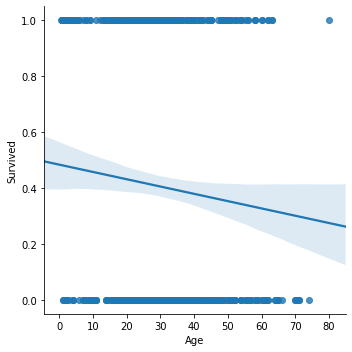

In [49]:
# linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

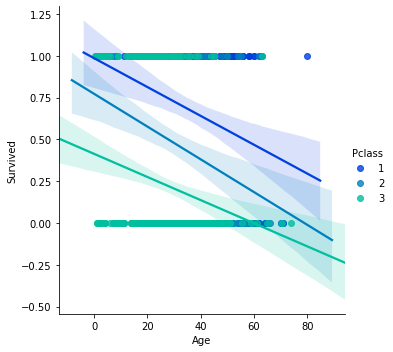

In [53]:
# linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

 clean up this figure and grab the data and bin it by age with a std attached!

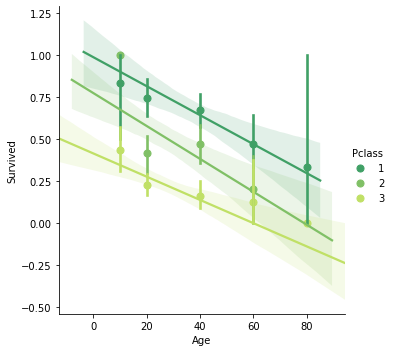

In [55]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='summer',x_bins=generations)

Interesting find on the old 1st class passengers! What about if we relate gender and age with the survival set?

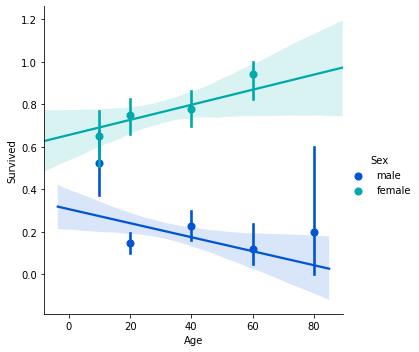

In [56]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

1.The older female had the more chance of survival and the older men had the less chance of survival.
2.If the person belongs to the set of (male,3rdclass,age>18) then the survival rate is very low.
3.Person belonging to the set of(child,1stclass) had the more chances of survival than anyone.